In [19]:
from torchvision import datasets
from torchvision import transforms
from torch import nn
import syft as sy
import torch

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST('mnist', download=True, train=True, transform=transform)
# valset = datasets.MNIST('mnist', download=True, train=False, transform=transform)


#Take first n images
data = trainset.data.view(trainset.data.shape[0], -1).float()
data = data
dataloader = torch.utils.data.DataLoader(data, batch_size=1024)

#Take first n targets
targets = trainset.targets
targetloader = torch.utils.data.DataLoader(targets, batch_size=1024)

tensor(0)


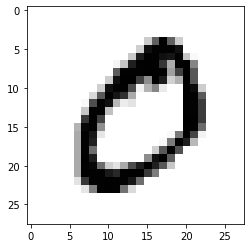

In [20]:
#Images are aligned
import matplotlib.pyplot as plt

plt.imshow(trainset.data[1].numpy().squeeze(), cmap='gray_r')
print(targets[1])

In [21]:
#Deploy same model as original tutorial

input_size = 784
hidden_sizes = [128, 640]
output_size = 10

class SyNet_client(sy.Module):
    def __init__(self, torch_ref):
        super(SyNet_client, self).__init__(torch_ref=torch_ref)
        self.lin1 = nn.Linear(input_size, hidden_sizes[0])
        self.lin2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        
    def forward(self, x):
        x = self.lin1(x)
        x = self.torch_ref.nn.functional.relu(x)
        x = self.lin2(x)
        x = self.torch_ref.nn.functional.relu(x)
        return x
    
class SyNet_server(sy.Module):
    def __init__(self, torch_ref):
        super(SyNet_server, self).__init__(torch_ref=torch_ref)
        self.lin3 = nn.Linear(hidden_sizes[1], output_size)
        self.sft = nn.LogSoftmax(dim=1) 
        
    def forward(self, x):
        x = self.lin3(x)
        x = self.sft(x)
        return x

In [22]:
#Model 1
model1 = SyNet_client(torch)
# model1_ptr = model1.send(duet)
opt1 = torch.optim.SGD(params=model1.parameters(),lr=0.3)

#Model 2
model2 = SyNet_server(torch)
opt2 = torch.optim.SGD(params=model2.parameters(),lr=0.3)

In [23]:
for image, target in zip(dataloader, targetloader):    
    opt1.zero_grad()
    opt2.zero_grad()
    
    activation = model1(image)
    pred = model2(activation)
    
    loss = torch.nn.functional.nll_loss(pred, target)
    loss.backward()
    
    opt1.step()
    opt2.step()
    
    print(loss)


tensor(13.2089, grad_fn=<NllLossBackward>)
tensor(474930.3438, grad_fn=<NllLossBackward>)
tensor(2.0354e+08, grad_fn=<NllLossBackward>)
tensor(12150485., grad_fn=<NllLossBackward>)
tensor(1832.1757, grad_fn=<NllLossBackward>)
tensor(5.6498, grad_fn=<NllLossBackward>)
tensor(2.8869, grad_fn=<NllLossBackward>)
tensor(2.6026, grad_fn=<NllLossBackward>)
tensor(2.3981, grad_fn=<NllLossBackward>)
tensor(2.3399, grad_fn=<NllLossBackward>)
tensor(3.1032, grad_fn=<NllLossBackward>)
tensor(2.3155, grad_fn=<NllLossBackward>)
tensor(2.3156, grad_fn=<NllLossBackward>)
tensor(2.3117, grad_fn=<NllLossBackward>)
tensor(2.3097, grad_fn=<NllLossBackward>)
tensor(2.3101, grad_fn=<NllLossBackward>)
tensor(2.3111, grad_fn=<NllLossBackward>)
tensor(2.3038, grad_fn=<NllLossBackward>)
tensor(2.3091, grad_fn=<NllLossBackward>)
tensor(2.3086, grad_fn=<NllLossBackward>)
tensor(2.3054, grad_fn=<NllLossBackward>)
tensor(2.3073, grad_fn=<NllLossBackward>)
tensor(2.3017, grad_fn=<NllLossBackward>)
tensor(2.3055, gra